In [1]:
# Feature Detection & Computing to Match Objects
###############################################
# Create Feature Detector
## sift_d = cv2.SIFT_create() # Scale Invariant Feature Transform
## orb_d = cv2.ORB_create()   # Oriented FAST and Rotated BRIEF

# Detect & Compute Features
## keypoint1, descriptor1 = sift_d.detectAndCompute(img1)
## keypoint2, descriptor2 = sift_d.detectAndCompute(img2)

# Draw the Features (if needed to see)
## img1_kp = cv2.drawKeypoints(
##     img1, kp1, 0, (0,0,255),cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
## )
## plt.imshow(img1_kp[:,:,::-1])

# Create a Brute-Force Matcher
## matcher = cv2.BFMatcher()

# Compute Distances of Features by Matching
## matches = matcher.knnMatch(des1, des2, k = 2)

# Count Matched Points based on Distance Threshold
## count = 0
## th = 20
## for m1, m2 in matches:
##     gap = abs(m1.distance - m2.distance)
##     if gap < th:
##         count += 1
## print(count, len(matches))

# Set Threshold to See if it matches closely (~95%)
## And call out for True or False

In [1]:
import cv2
import matplotlib.pyplot as plt
from img_util import imshow
import numpy as np

In [2]:
cat1 = cv2.imread('cat.jpg')
cat3 = cv2.imread('cat3.jpeg')

dog1 = cv2.imread('dog.jpg')
dog2 = cv2.imread('dog2.png')
dog3 = cv2.imread('dog3.png')

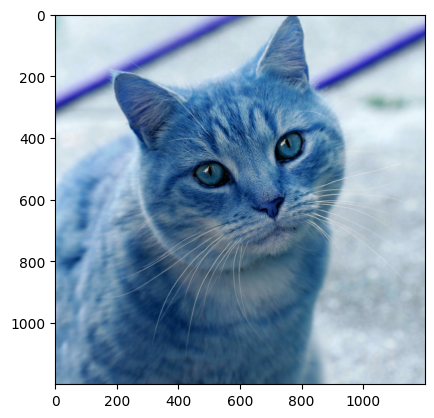

In [5]:
plt.imshow(cat3)

In [6]:
sift_d = cv2.SIFT_create()
orb_d = cv2.ORB_create()

In [7]:
def detectAndCompute(detector, images):
    kps = []
    des = []
    for img in images:
        keypoint, descriptor = detector.detectAndCompute(img, None)
        kps.append(keypoint)
        des.append(descriptor)
    return kps,des

images = [cat1,cat3,dog1,dog2,dog3]
sift_kp, sift_des = detectAndCompute(sift_d, images)
orb_kp, orb_des = detectAndCompute(orb_d, images)

In [8]:
for kp in sift_kp:
    print(len(kp))
print('....')
for kp in orb_kp:
    print(len(kp))

1349
1734
555
5799
626
....
500
500
500
500
500


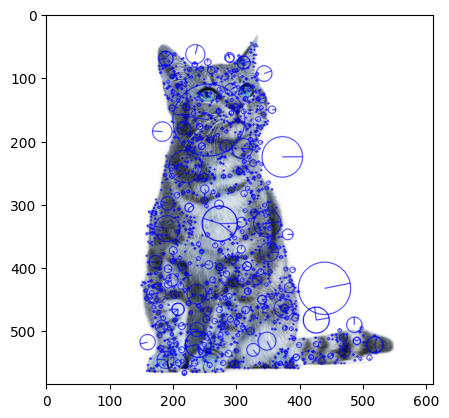

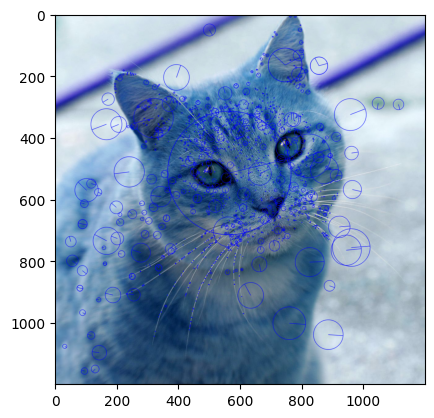

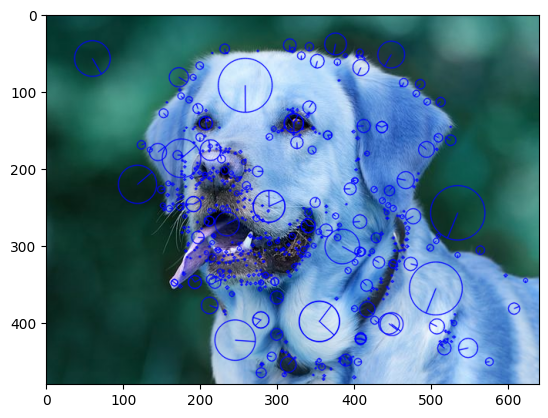

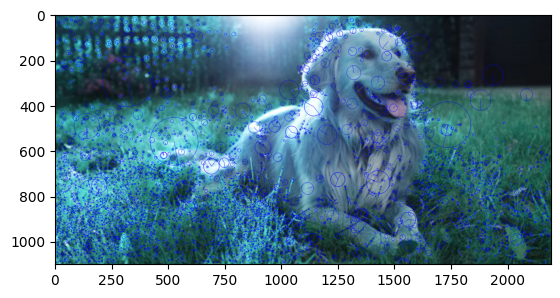

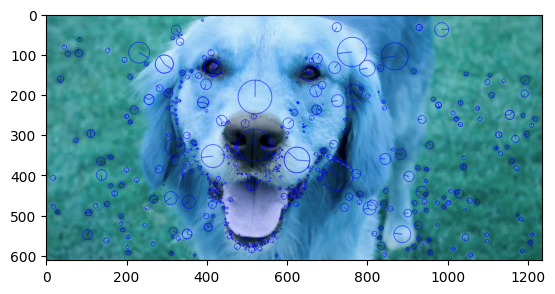

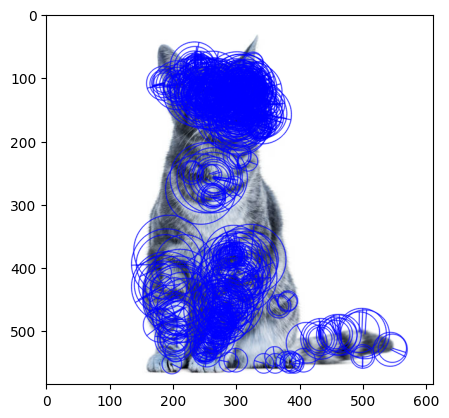

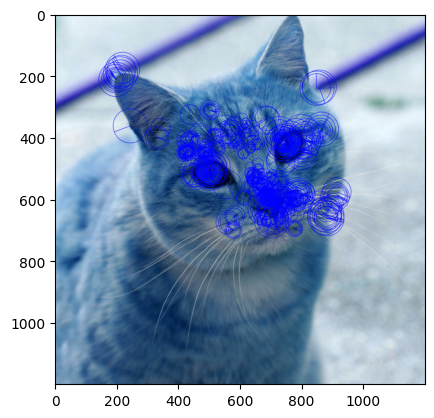

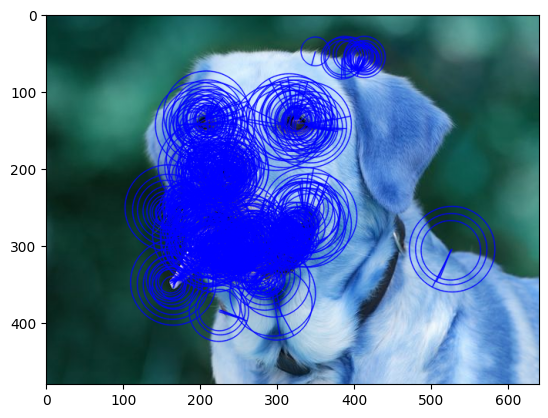

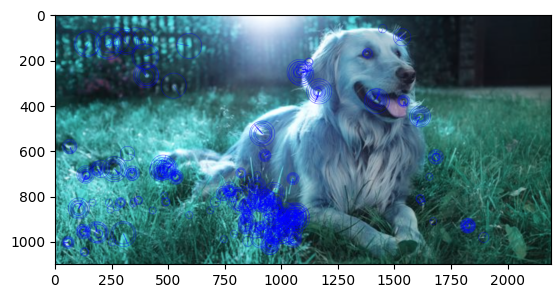

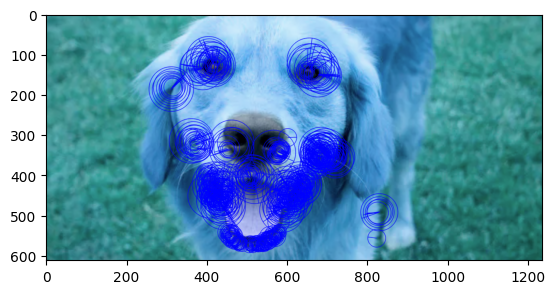

In [10]:
def drawKeypoints(img, kp):
    img_kp = cv2.drawKeypoints(
        img, kp, 0, (0,0,255),cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
    )
    plt.imshow(img_kp)
    plt.show()

for img,kp in zip(images,sift_kp):
    drawKeypoints(img,kp)
for img,kp in zip(images,orb_kp):
    drawKeypoints(img,kp)

In [11]:
matcher = cv2.BFMatcher()

In [12]:
# def compare_des(query, descs, tol=0.02, th=0.95):
#     results = []
#     for des in descs:
#         matches = matcher.knnMatch(query, des, k = 2)
#         count = 0
        
#         for m1, m2 in matches:
#             gap = abs(m1.distance - m2.distance)
#             if gap < (tol * m1.distance):
#                 count += 1
#         if count/len(matches) > th:
#             results.append(True)
#         else:
#             results.append(False)
#     return results

# sift_res = compare_des(sift_des[-1], sift_des[:-1])
# orb_res = compare_des(orb_des[-1], orb_des[:-1])

In [13]:
def compare_des(query, descs):
    results = []
    for des in descs:
        matches = matcher.match(query, des)
        matches = [val.distance for val in matches]
        mean = np.mean(matches)
        results.append(mean)
    return results
sift_res = compare_des(sift_des[-1], sift_des[:-1])
orb_res = compare_des(orb_des[-1], orb_des[:-1])

In [14]:
labels = ['cat','cat','dog','dog']
prediction = labels[sift_res.index(min(sift_res))]
print(prediction)


dog


In [15]:
sift_res

[305.929792763707, 301.50694443090276, 320.58561912512243, 286.18682017950965]

In [16]:
orb_res

[337.24139865112306, 337.33105642700195, 330.9215179595947, 356.8679698181152]